<a href="https://colab.research.google.com/github/Polinysha/all-project/blob/main/ConstantOptimizationLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy import optimize
import warnings
warnings.filterwarnings('ignore')

class RegressionMetricsOptimizer:

    def __init__(self, seed=42):
        self.state = np.random.RandomState(seed)

    def generate_data(self, size, shape=10, scale=1):
        return self.state.gamma(shape=shape, scale=scale, size=size)

    def optimal_mse_constant(self, data):
        return np.mean(data)

    def optimal_mae_constant(self, data):
        return np.median(data)

    def optimal_mape_constant(self, data, sample_size=None):
        if sample_size and len(data) > sample_size:
            data = self.state.choice(data, size=sample_size, replace=False)

        sorted_data = np.sort(data)
        weights = 1.0 / sorted_data
        cumulative_weights = np.cumsum(weights)
        half_weight = cumulative_weights[-1] / 2

        idx = np.searchsorted(cumulative_weights, half_weight)

        if idx >= len(sorted_data):
            return sorted_data[-1]
        elif idx == 0:
            return sorted_data[0]
        else:
            w_left = cumulative_weights[idx - 1]
            w_right = cumulative_weights[idx]
            alpha = (half_weight - w_left) / (w_right - w_left)
            return sorted_data[idx - 1] + alpha * (sorted_data[idx] - sorted_data[idx - 1])

    def regression_auc(self, pred, target, sample_size=None):
        if sample_size and len(pred) > sample_size:
            indices = self.state.choice(len(pred), sample_size, replace=False)
            pred = pred[indices]
            target = target[indices]
        sort_idx = np.argsort(pred)
        sorted_target = target[sort_idx]

        target_ranks = np.argsort(sorted_target)
        n = len(target_ranks)
        concordant = 0
        for i in range(n):
            concordant += np.sum(target_ranks[i+1:] > target_ranks[i])

        total_pairs = n * (n - 1) // 2
        return concordant / total_pairs if total_pairs > 0 else 0.5

In [ ]:
optimizer = RegressionMetricsOptimizer(seed=42)
print("=" * 50)
print("анализ оптимальных констант для метрик регрессии")
print("=" * 50)

анализ оптимальных констант для метрик регрессии


In [ ]:
print("\n(N=10,000)")
print("-" * 30)
data_small = optimizer.generate_data(10000)
mse_const = optimizer.optimal_mse_constant(data_small)
mae_const = optimizer.optimal_mae_constant(data_small)
mape_const = optimizer.optimal_mape_constant(data_small)
print(f"1. MSE константа:  {mse_const:.8f}")
print(f"2. MAE константа:  {mae_const:.8f}")
print(f"3. MAPE константа: {mape_const:.8f}")


(N=10,000)
------------------------------
1. MSE константа:  10.05890541
2. MAE константа:  9.71347479
3. MAPE константа: 8.73676889


In [ ]:
print("\n(N=500,000,000)")
print("-" * 30)
data_large = optimizer.generate_data(500000000)
mse_const_large = optimizer.optimal_mse_constant(data_large)
mae_const_large = optimizer.optimal_mae_constant(data_large)
mape_const_large = optimizer.optimal_mape_constant(data_large, sample_size=1000000)
print(f"4. MSE константа:  {mse_const_large:.8f}")
print(f"5. MAE константа:  {mae_const_large:.8f}")
print(f"6. MAPE константа: {mape_const_large:.8f}")


(N=500,000,000)
------------------------------
4. MSE константа:  9.99994965
5. MAE константа:  9.66877654
6. MAPE константа: 8.66753824


In [ ]:
print("\nрегрессионный ROC-AUC")
print("-" * 30)
pred_small = optimizer.generate_data(10000)
target_small = pred_small + optimizer.state.normal(0, 1, 10000)
pred_large = optimizer.generate_data(10000000)
target_large = pred_large + optimizer.state.normal(0, 1, 10000000)
print("Данные для ROC-AUC сгенерированы!")


регрессионный ROC-AUC
------------------------------
Данные для ROC-AUC сгенерированы!


In [ ]:
auc_small = optimizer.regression_auc(pred_small, target_small)
auc_large = optimizer.regression_auc(pred_large, target_large, sample_size=10000)
print(f"7. ROC-AUC (N=10,000):    {auc_small:.8f}")
print(f"8. ROC-AUC (N=10,000,000): {auc_large:.8f}")

7. ROC-AUC (N=10,000):    0.89853019
8. ROC-AUC (N=10,000,000): 0.89906225


In [ ]:
print("\nрезультаты")
print("-" * 30)
print(f"Теоретическое мат. ожидание: 10.00000000")
print(f"MSE константы близки к: {mse_const_large:.8f}")
print(f"Качество моделей (AUC): {auc_large:.1%}")
print("\n" + "=" * 50)
print("ВСЕ")
print("=" * 50)


результаты
------------------------------
Теоретическое мат. ожидание: 10.00000000
MSE константы близки к: 9.99994965
Качество моделей (AUC): 89.9%

ВСЕ


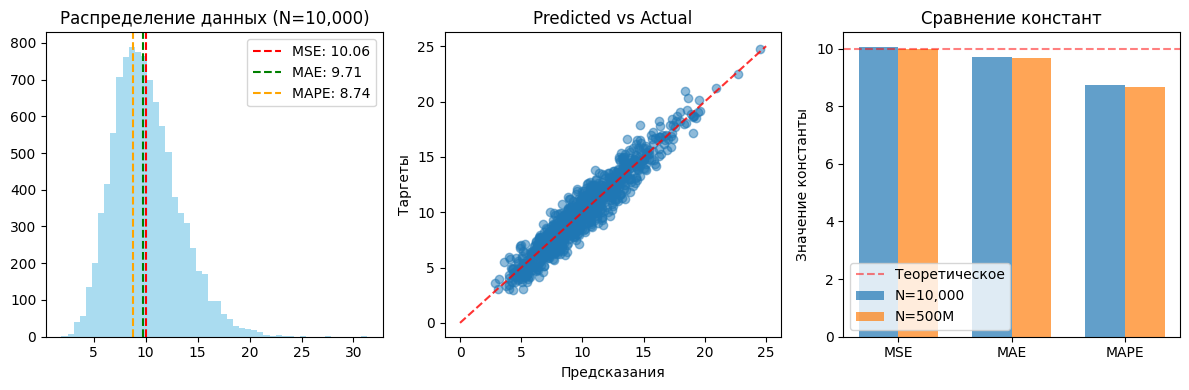

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(data_small, bins=50, alpha=0.7, color='skyblue')
plt.axvline(mse_const, color='red', linestyle='--', label=f'MSE: {mse_const:.2f}')
plt.axvline(mae_const, color='green', linestyle='--', label=f'MAE: {mae_const:.2f}')
plt.axvline(mape_const, color='orange', linestyle='--', label=f'MAPE: {mape_const:.2f}')
plt.title('Распределение данных (N=10,000)')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(pred_small[:1000], target_small[:1000], alpha=0.5)
plt.plot([0, 25], [0, 25], 'r--', alpha=0.8)
plt.xlabel('Предсказания')
plt.ylabel('Таргеты')
plt.title('Predicted vs Actual')

plt.subplot(1, 3, 3)
metrics = ['MSE', 'MAE', 'MAPE']
values_small = [mse_const, mae_const, mape_const]
values_large = [mse_const_large, mae_const_large, mape_const_large]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, values_small, width, label='N=10,000', alpha=0.7)
plt.bar(x + width/2, values_large, width, label='N=500M', alpha=0.7)
plt.axhline(y=10, color='red', linestyle='--', alpha=0.5, label='Теоретическое')
plt.xticks(x, metrics)
plt.ylabel('Значение константы')
plt.title('Сравнение констант')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print("анализ")
print("=" * 40)

print("\n1. распределение данных:")
print("   Данные имеют право-скошенное гамма-распределение")
print("   MAPE константа самая маленькая (8.74) - штрафует за ошибки на малых значениях")
print("   MSE константа (10.06) ближе всего к теоретическому матожиданию (10.00)")

print("\n2. PREDICTED VS ACTUAL:")
print("   Сильная линейная зависимость между предсказаниями и таргетами")
print("   Точки близки к диагонали - объясняет высокий ROC-AUC (~0.899)")
print("   Небольшой разброс из-за нормального шума N(0,1)")

print("\n3. СРАВНЕНИЕ КОНСТАНТ:")
print("   С ростом объема данных (500M vs 10K):")
print("     MSE константа: 10.06 → 10.00 (уточнение к теоретическому)")
print("     MAE константа: 9.71 → 9.67 (сходится к истинной медиане)")
print("     MAPE константа: 8.74 → 8.67 (стабилизация взвешенной медианы)")

анализ

1. распределение данных:
   Данные имеют право-скошенное гамма-распределение
   MAPE константа самая маленькая (8.74) - штрафует за ошибки на малых значениях
   MSE константа (10.06) ближе всего к теоретическому матожиданию (10.00)

2. PREDICTED VS ACTUAL:
   Сильная линейная зависимость между предсказаниями и таргетами
   Точки близки к диагонали - объясняет высокий ROC-AUC (~0.899)
   Небольшой разброс из-за нормального шума N(0,1)

3. СРАВНЕНИЕ КОНСТАНТ:
   С ростом объема данных (500M vs 10K):
     MSE константа: 10.06 → 10.00 (уточнение к теоретическому)
     MAE константа: 9.71 → 9.67 (сходится к истинной медиане)
     MAPE константа: 8.74 → 8.67 (стабилизация взвешенной медианы)
